# National Cancer Institute Inclusion Reports

Data scraped and processed with Power Query
- https://report.nih.gov/sites/report/files/docs/2019-NCI-Triennial-Inclusion-Report.pdf 
- https://report.nih.gov/sites/report/files/docs/NCITriennialInclusionReportFY2019_FY2021Final.pdf

Appendix B: **Enrollment for All NIH-Defined Clinical Research**, illustrated in NCI Triennial Inclusion Reports

### Sex & Ethnicity vs Enrollment for NIH-Defined Clinical Research

In [4]:
import pandas as pd
enroll_ethn=pd.read_csv('~/Desktop/PIC16B/PIC16B Project/diversity/cancer/Enroll_ethnicity.csv')
enroll_ethn.head()

,Year,Sex,Ethnicity,Enrollment
0,2016,Female,Not Hispanic,2257542
1,2016,Female,Hispanic Latino,189508
2,2016,Male,Not Hispanic,1414034
3,2016,Male,Hispanic Latino,136656
4,2017,Female,Not Hispanic,3343498


In [16]:
enroll_ethn['Ethnicity, Sex'] = enroll_ethn[enroll_ethn.columns[1:3]].apply(
    lambda x: ', '.join(x.dropna().astype(str)), axis=1)
enroll_ethn.head()

,Year,Sex,Ethnicity,Enrollment,eth_sex,"Ethnicity, Sex"
0,2016,Female,Not Hispanic,2257542,"Female, Not Hispanic","Female, Not Hispanic"
1,2016,Female,Hispanic Latino,189508,"Female, Hispanic Latino","Female, Hispanic Latino"
2,2016,Male,Not Hispanic,1414034,"Male, Not Hispanic","Male, Not Hispanic"
3,2016,Male,Hispanic Latino,136656,"Male, Hispanic Latino","Male, Hispanic Latino"
4,2017,Female,Not Hispanic,3343498,"Female, Not Hispanic","Female, Not Hispanic"


In [18]:
import plotly.express as px
fig = px.bar(enroll_ethn, x="Year", y="Enrollment", 
             color='Ethnicity, Sex', hover_name="Ethnicity, Sex")
fig.show()

## Sex & Race vs Enrollment for NIH-Defined Clinical Research

In [88]:
enroll_race=pd.read_csv('~/Desktop/PIC16B/PIC16B Project/diversity/cancer/Enroll_race.csv')
enroll_race

,Year,Sex,Race,Enrollment
0,2016,Female,American Indian Alaska Native,8289
1,2016,Female,Asian,185301
2,2016,Female,Black African American,162469
3,2016,Female,Native Hawaiian Pacific Islander,3832
4,2016,Female,White,2147704
...,...,...,...,...
67,2021,Male,Asian,137938
68,2021,Male,Black African American,175627
69,2021,Male,Native Hawaiian Pacific Islander,29970
70,2021,Male,White,1420952


In [107]:
enroll_race['Race, Sex'] = enroll_race[enroll_race.columns[1:3]].apply(
    lambda x: ', '.join(x.dropna().astype(str)), axis=1)

fig = px.bar(enroll_race, x="Sex", y="Enrollment", facet_col="Year",
             color='Race', hover_name="Race, Sex", barmode='group')
fig.show()

# Data from NIH RCDC Inclusion Statistics Report
- https://report.nih.gov/RISR/#/home?single=All%20Studies&ic=NCI&rcdcFilter=cancer&facet=Race&fiscalYear=2021

In [145]:
rcdc=pd.read_csv('2021-Race-Exc-Single.csv')
cols=['RCDC Category',
      'American Indian or Alaska Native Participants','Asian Participants',
      'Native Hawaiian or Other Pacific Islander Participants','Black or African American Participants',
      'White Participants','Participants of More than One Race','Participants of Unknown or Unreported Race']
rcdc=rcdc[cols]
rcdc=pd.DataFrame(rcdc.replace('<12',0))

for col in cols[1:]:
    rcdc[col]=rcdc[col].astype(int)

rcdc

,RCDC Category,American Indian or Alaska Native Participants,Asian Participants,Native Hawaiian or Other Pacific Islander Participants,Black or African American Participants,White Participants,Participants of More than One Race,Participants of Unknown or Unreported Race
0,Brain Cancer,187,81047,50,7894,45793,190,8202
1,Breast Cancer,9142,200317,2394,161097,1256260,23005,299274
2,Cancer,29466,456813,62967,552598,3502761,55345,863694
3,Cancer Genomics,622,35986,223,29577,330304,1006,22825
4,Cervical Cancer,689,2947,107,11052,52663,565,120817
5,Colo-Rectal Cancer,2146,4498,270,14704,109212,1304,24393
6,Esophageal Cancer,46,40709,0,867,59410,54,1027
7,HPV and/or Cervical Cancer Vaccines,583,1899,26,6354,11899,242,114025
8,Liver Cancer,399,11072,22,6128,35445,317,3166
9,Lung Cancer,13647,236492,59214,297611,1373180,1395,371791


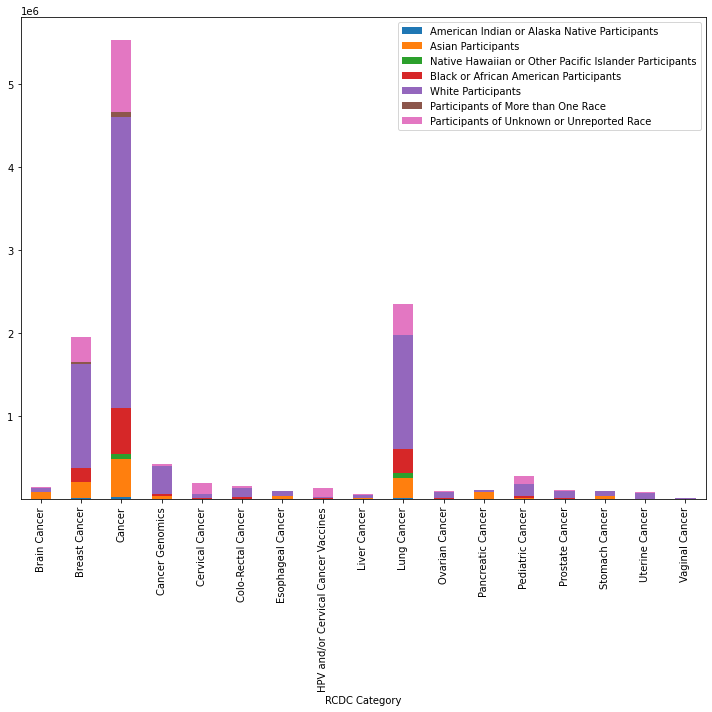

In [153]:
import matplotlib.pyplot as plt
rcdc.set_index('RCDC Category').plot(kind='bar', stacked=True,figsize=(10,10))
plt.tight_layout()
plt.legend()

In [152]:
import plotly.express as px

fig = px.bar(rcdc, x="RCDC Category", y=cols[1:])
fig.update_layout(xaxis_tickangle=-45)
fig.show()